In [176]:
import pandas as pd
import seaborn as sns

In [178]:
mpg = sns.load_dataset("mpg")
df =  mpg.copy()  #Some data can be dropped so we work on copied data.
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [179]:
df.shape #We should look at the data first.

(398, 9)

In [180]:
df.isnull().values.any() 

True

In [182]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [197]:
mode = df["horsepower"].mode()

In [198]:
mode

0    150.0
dtype: float64

In [200]:
import numpy as np
df["horsepower"] = df["horsepower"].replace(np.nan, 150.0)

In [204]:
df.isnull().values.any() #Any value is NAN, perfect 

False

In [234]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,105.155779,38.600986,46.0,76.000,95.0,130.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [209]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [211]:
df_num #Every variable category is numerical

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


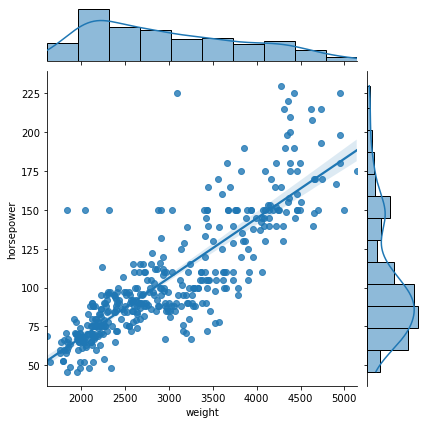

In [212]:
sns.jointplot(x = "weight", y = "horsepower", kind = "reg", data = df);

In [215]:
x = df[["weight"]]
y = df[["horsepower"]]   

In [216]:
reg = LinearRegression()

In [217]:
reg_model = reg.fit(x,y)

In [218]:
reg_model.intercept_ #b0 coefficient

array([-8.81882806])

In [219]:
reg_model.coef_ #b1 coefficient

array([[0.0383698]])

In [220]:
reg_model.score(x,y)

0.7085767250847661

In [222]:
reg_model.intercept_ + reg_model.coef_*4000 

array([[144.66038305]])

In [223]:
reg_model.predict([[4000]])

array([[144.66038305]])

In [263]:
actual_y = y[0:398]
predicted_y = pd.DataFrame(reg_model.predict(x)[0:398])

In [264]:
errors = pd.concat([actual_y , predicted_y], axis = 1)

In [265]:
errors

,horsepower,0
0,130.0,125.628961
1,165.0,132.880854
2,150.0,123.019814
3,150.0,122.904705
4,140.0,123.518622
...,...,...
393,86.0,98.232922
394,52.0,72.908852
395,84.0,79.239869
396,79.0,91.901904


In [266]:
errors.columns = ["actual_y", "predicted_y"]

In [267]:
errors

,actual_y,predicted_y
0,130.0,125.628961
1,165.0,132.880854
2,150.0,123.019814
3,150.0,122.904705
4,140.0,123.518622
...,...,...
393,86.0,98.232922
394,52.0,72.908852
395,84.0,79.239869
396,79.0,91.901904


In [269]:
errors["error"] = errors["actual_y"] - errors["predicted_y"]

In [270]:
errors

,actual_y,predicted_y,error
0,130.0,125.628961,4.371039
1,165.0,132.880854,32.119146
2,150.0,123.019814,26.980186
3,150.0,122.904705,27.095295
4,140.0,123.518622,16.481378
...,...,...,...
393,86.0,98.232922,-12.232922
394,52.0,72.908852,-20.908852
395,84.0,79.239869,4.760131
396,79.0,91.901904,-12.901904


In [271]:
errors["squared_errors"] = errors["error"] ** 2 

In [272]:
errors

,actual_y,predicted_y,error,squared_errors
0,130.0,125.628961,4.371039,19.105983
1,165.0,132.880854,32.119146,1031.639566
2,150.0,123.019814,26.980186,727.930421
3,150.0,122.904705,27.095295,734.155018
4,140.0,123.518622,16.481378,271.635830
...,...,...,...,...
393,86.0,98.232922,-12.232922,149.644373
394,52.0,72.908852,-20.908852,437.180086
395,84.0,79.239869,4.760131,22.658844
396,79.0,91.901904,-12.901904,166.459133


In [273]:
import numpy as np
np.mean(errors["squared_errors"]) 

433.14017416653223